In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
yf.download('GOOG', period="12mo")
# returns a dataframe

/tmp/ipykernel_10534/903308904.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download('GOOG', period="12mo")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-11-15,173.132248,175.113582,171.992233,174.874622,21708900
2024-11-18,176.029572,176.139093,173.659938,174.192610,18662800
2024-11-19,178.797440,179.384865,174.352888,174.471373,15392900
2024-11-20,176.557266,178.329508,174.565981,178.050730,15729800
2024-11-21,168.502518,174.814887,164.589635,174.690431,38839400
...,...,...,...,...,...
2025-11-10,290.589996,291.459991,283.540009,285.265015,19508200
2025-11-11,291.739990,292.339996,287.880005,288.200012,14156700


/tmp/ipykernel_10534/2136402755.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GOOG', period="12mo")
[*********************100%***********************]  1 of 1 completed


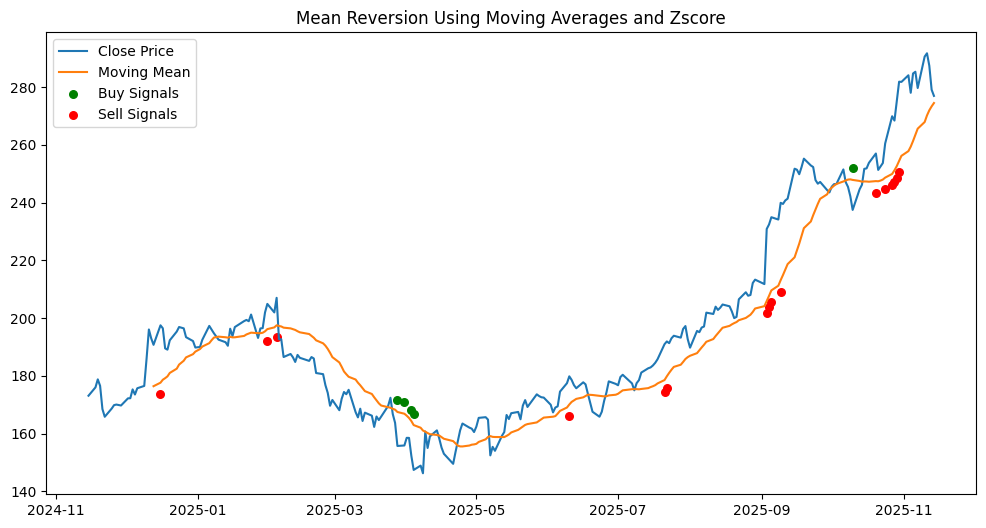

In [4]:
data = yf.download('GOOG', period="12mo")
rolling_window = 20
#zscore = (current_price - mean) / std_dev
data["mean"] = data["Close"]["GOOG"].rolling(rolling_window).mean()
data["std"] = data['Close']['GOOG'].rolling(rolling_window).std()

data["zscore"] = (data['Close']['GOOG'] - data['mean']) / data['std']

# if zscore > 2, sell (-)
# if zscore < 2, buy(+)
data['signal'] = 0
data.loc[data["zscore"] > 2, 'signal'] = -1 # possibility of bearish
data.loc[data['zscore'] < -2 , 'signal'] = 1 # possibility of bullish
#* Plot
plt.figure(figsize=(12,6))
#y-axis - Prices
#x-axis - Period
# Plot the daily closing prices
plt.plot(data['Close']['GOOG'], label='Close Price')
# Plot the moving mean/average
plt.plot(data['mean'], label='Moving Mean')

# zscore

buy_signals = data[data['signal'] == 1]
plt.scatter(buy_signals.index, data.loc[buy_signals.index, 'mean'] + 4, color='green', s=30, label='Buy Signals')

sell_signals = data[data['signal'] == -1]
plt.scatter(sell_signals.index, data.loc[sell_signals.index, 'mean'] - 4, color='red', label="Sell Signals", s=30, )

plt.legend()
plt.title("Mean Reversion Using Moving Averages and Zscore")

plt.show()


In [5]:
# x = [1, 2, 3]
# y = [10, 20 ,30]
# plt.plot(x, y, 'o')
# # plt.scatter(x, y)
# plt.xlabel("X")
# plt.ylabel('Y')
# plt.title("Whatever")
# 
# plt.show()